## 本章包含以下主题：

1. 线性回归模型
2. 评估线性回归模型
3. 用岭回归弥补线性回归的不足
4. 优化岭回归参数
5. LASSO正则化
6. LARS正则化
7. 用线性方法处理分类问题——逻辑回归
8. 贝叶斯岭回归
9. 用梯度提升回归从误差中学习

***简介***

线性模型是统计学和机器学习的基础。很多方法都利用变量的线性组合描述数据之
间的关系。通常都要花费很大精力做各种变换，目的就是为了让数据可以描述成一
种线性组合形式。

本章，我们将从最简单的数据直线拟合模型到分类模型，最后介绍贝叶斯岭回归。

## 线性回归模型
现在，我们来做一些建模！我们从最简单的线性回归（Linear regression）开始。
线性回归是最早的也是最基本的模型——把数据拟合成一条直线。
### Getting ready
boston 数据集很适合用来演示线性回归。 boston 数据集包含了波士顿地区的
房屋价格中位数。还有一些可能会影响房价的因素，比如犯罪率（crime rate）。
首先，让我们加载数据：

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

### How to do it...
实际上，用scikit-learn的线性回归非常简单，其API和前面介绍的模型一样。
首先，导入 LinearRegression 类创建一个对象：

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [4]:
lr.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 评估线性回归模型

在这个主题中，我们将介绍回归模型拟合数据的效果。上一个主题我们拟合了数
据，但是并没太关注拟合的效果。每当拟合工作做完之后，我们应该问的第一个问
题就是“拟合的效果如何？”本主题将回答这个问题。
### Getting ready
我们还用上一主题里的 lr 对象和 boston 数据集。 lr 对象已经拟合过数据，
现在有许多方法可以用。

In [10]:
prediction = lr.predict(boston.data)

### How to do it...
我们可以看到一些简单的量度（metris）和图形。让我们看看上一章的残差图：

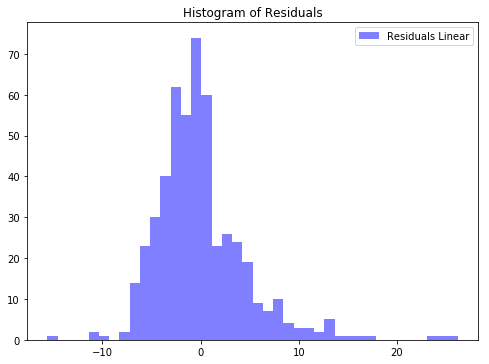

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(boston.target - prediction,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best')

和之前介绍的一样，误差项服从均值为0的正态分布。残差就是误差，所以这个图
也应噶近似正态分布。看起来拟合挺好的，只是有点偏。我们计算一下残差的均
值，应该很接近0：

In [13]:
import numpy as np
np.mean(boston.target - prediction)

-1.7272086264524175e-15

另一个值得看的图是Q-Q图（分位数概率分布），我们用Scipy来实现图形，因为它
内置这个概率分布图的方法：

((array([ -2.99573567e+00,  -2.71411028e+00,  -2.55577619e+00,
          -2.44351800e+00,  -2.35556494e+00,  -2.28276382e+00,
          -2.22036495e+00,  -2.16557440e+00,  -2.11660431e+00,
          -2.07223893e+00,  -2.03161265e+00,  -1.99408648e+00,
          -1.95917475e+00,  -1.92649942e+00,  -1.89576017e+00,
          -1.86671438e+00,  -1.83916307e+00,  -1.81294098e+00,
          -1.78790928e+00,  -1.76395019e+00,  -1.74096288e+00,
          -1.71886034e+00,  -1.69756695e+00,  -1.67701655e+00,
          -1.65715093e+00,  -1.63791855e+00,  -1.61927361e+00,
          -1.60117517e+00,  -1.58358651e+00,  -1.56647453e+00,
          -1.54980933e+00,  -1.53356377e+00,  -1.51771316e+00,
          -1.50223493e+00,  -1.48710847e+00,  -1.47231481e+00,
          -1.45783653e+00,  -1.44365756e+00,  -1.42976302e+00,
          -1.41613915e+00,  -1.40277318e+00,  -1.38965322e+00,
          -1.37676820e+00,  -1.36410778e+00,  -1.35166231e+00,
          -1.33942275e+00,  -1.32738062e+00,  -1.315527

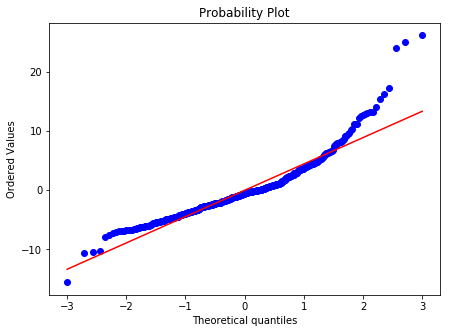

In [16]:
from scipy.stats import probplot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
probplot(boston.target - prediction, plot=ax)

这个图里面倾斜的数据比之前看的要更清楚一些。
我们还可以观察拟合其他量度，最常用的还有均方误差（mean squared error，
MSE），平均绝对误差（mean absolute deviation，MAD）。让我们用Python实现
这两个量度。后面我们用scikit-learn内置的量度来评估回归模型的效果：

In [17]:
def MSE(target, predictions):
    squared_deviation = np.power(target - predictions, 2)
    return np.mean(squared_deviation)

In [19]:
MSE(boston.target, prediction)

21.897779217687496

### How it works...
MSE的计算公式是：
$$E(\hat y_t - y_i)^2$$
计算预测值与实际值的差，平方之后再求平均值。这其实就是我们寻找最佳相关系
数时是目标。高斯－马尔可夫定理（Gauss-Markov theorem）实际上已经证明了
线性回归的回归系数的最佳线性无偏估计（BLUE）就是最小均方误差的无偏估计
（条件是误差变量不相关，0均值，同方差）。在用岭回归弥补线性回归的不足主
题中，我们会看到，当我们的相关系数是有偏估计时会发生什么。
MAD是平均绝对误差，计算公式为：
$$E|\hat y_t - y_i|$$
线性回归的时候MAD通常不用，但是值得一看。为什么呢？可以看到每个量度的情
况，还可以判断哪个量度更重要。例如，用MSE，较大的误差会获得更大的惩罚，
因为平方把它放大。
### There's more...
还有一点需要说明，那就是相关系数是随机变量，因此它们是有分布的。让我们用
bootstrapping（重复试验）来看看犯罪率的相关系数的分布情况。bootstrapping是
一种学习参数估计不确定性的常用手段：

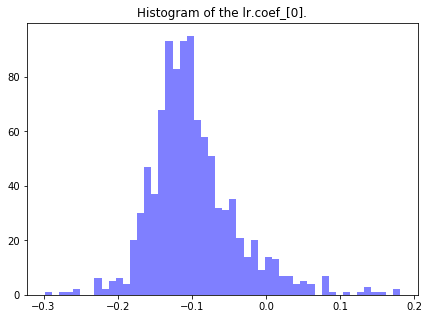

In [21]:
n_bootstraps = 1000
len_boston = len(boston.target)
subsample_size = np.int(0.5*len_boston)
subsample = lambda: np.random.choice(np.arange(0, len_boston),size=subsample_size)
coefs = np.ones(n_bootstraps) #相关系数初始值设为1
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50, color='b', alpha=.5)
ax.set_title("Histogram of the lr.coef_[0].")

我们还想看看重复试验后的置信区间：

In [22]:
np.percentile(coefs, [2.5, 97.5])

array([-0.19161442,  0.04642102])

置信区间的范围表面犯罪率其实不影响房价，因为0在置信区间里面，表面犯罪率
可能与房价无关。
值得一提的是，bootstrapping可以获得更好的相关系数估计值，因为使用
bootstrapping方法的均值，会比普通估计方法更快地收敛（converge）到真实均
值。

## 用岭回归弥补线性回归的不足

本主题将介绍岭回归。和线性回归不同，它引入了正则化参数来“缩减”相关系数。
当数据集中存在共线因素时，岭回归会很有用。
### Getting ready
让我们加载一个不满秩（low effective rank）数据集来比较岭回归和线性回归。秩
是矩阵线性无关组的数量，满秩是指一个$m \times n$矩阵中行向量或列向量中现
行无关组的数量等于$min(m,n)$。
### How to do it...
首先我们用 make_regression 建一个有3个自变量的数据集，但是其秩为2，因此
3个自变量中有两个自变量存在相关性。

In [27]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

首先，我们用普通的线性回归拟合：

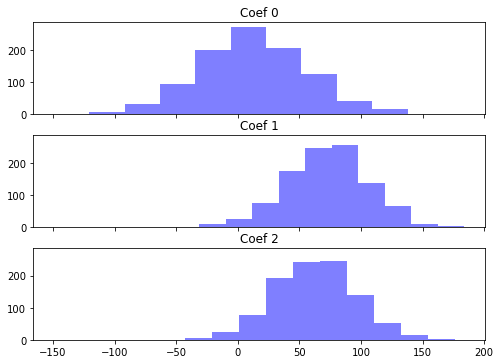

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

def fit_2_regression(lr):
    n_bootstraps = 1000
    coefs = np.ones((n_bootstraps,3))
    len_data = len(reg_data)
    subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)
    
    for i in range(n_bootstraps):
        subsample_idx = subsample()
        subsample_X = reg_data[subsample_idx]
        subsample_y = reg_target[subsample_idx]
        lr.fit(subsample_X, subsample_y)
        coefs[i][0] = lr.coef_[0]
        coefs[i][1] = lr.coef_[1]
        coefs[i][2] = lr.coef_[2]
    %matplotlib inline
    import matplotlib.pyplot as plt
    f, axes = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(7, 5))
    f.tight_layout()
    
    for i , ax in enumerate(axes):
        ax.hist(coefs[:, i], color='b', alpha=.5)
        ax.set_title('Coef {}'.format(i))
    return coefs

coefs = fit_2_regression(lr)

我们再用 Ridge 来拟合数据，对比结果：

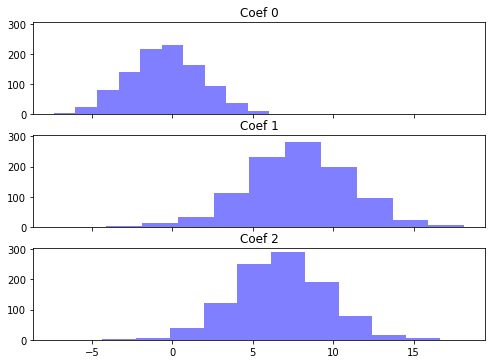

In [31]:
from sklearn.linear_model import Ridge
coefs_r = fit_2_regression(Ridge())

两个回归算法的结果看着好像差不多，其实不然。岭回归的相关系数更接近0。让
我们看看两者相关系数的差异：

In [33]:
np.mean(coefs - coefs_r, axis=0)

array([ 12.87048842,  65.11694794,  55.43529134])

从均值上看，线性回归比岭回归的相关系数要更很多。均值显示的差异其实是线性
回归的相关系数隐含的偏差。那么，岭回归究竟有什么好处呢？让我们再看看相关
系数的方差：

In [34]:
np.var(coefs, axis=0)

array([ 1831.77777202,  1061.15709712,  1054.64645398])

In [35]:
np.var(coefs_r, axis=0)

array([  5.11955779,  10.10579289,   8.32239331])

岭回归的相关系数方差也会小很多。这就是机器学习里著名的偏差-方差均衡(Bias-
Variance Trade-off)。下一个主题我们将介绍如何调整岭回归的参数正则化，那是
偏差-方差均衡的核心内容。
### How it works...
介绍参数正则化之前，我们总结一下岭回归与线性回归的不同。前面介绍过，线性
回归的目标是最小化 $ {\begin{Vmatrix} \hat y - X \beta \end{Vmatrix}}^2 $。
岭回归的目标是最小化 $ {\begin{Vmatrix} \hat y - X \beta \end{Vmatrix}}^2 +
{\begin{Vmatrix} \Gamma X \end{Vmatrix}}^2 $。
其中，$\Gamma$就是岭回归 Ridge 的 alpha 参数，指单位矩阵的倍数。上面
的例子用的是默认值。我们可以看看岭回归参数：

In [36]:
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

前面的一半和线性回归的相关系数的解是一样的，多了$\Gamma ^ T \Gamma)$一
项。矩阵$A$的$AA^T$的结果是对称矩阵，且是半正定矩阵（对任意非0向量
$x$，有$x^TAx \ge 0$）。相当于在线性回归的目标函数分母部分增加了一个很大
的数。这样就把相关系数挤向0了。这样的解释比较粗糙，要深入了解，建议你看
看SVD（矩阵奇异值分解）与岭回归的关系。

## 优化岭回归参数

当你使用岭回归模型进行建模时，需要考虑 Ridge 的 alpha 参数。
例如，用OLS（普通最小二乘法）做回归也许可以显示两个变量之间的某些关系；
但是，当 alpha 参数正则化之后，那些关系就会消失。做决策时，这些关系是否
需要考虑就显得很重要了。
### Getting ready
这是我们第一个进行模型参数优化的主题，通常用交叉检验（cross validation）完
成。在后面的主题中，还会有更简便的方式实现这些，但是这里我们一步一步来实
现岭回归的优化。
在scikit-learn里面，岭回归的$\Gamma$参数就
是 RidgeRegression 的 alpha 参数；因此，问题就是最优的 alpha 参数是什
么。首先我们建立回归数据集：

In [38]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=100, n_features=2, effective_rank=1, noise=10)

In [39]:
import numpy as np
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

拟合模型之后， alpha 参数就是最优参数：

In [40]:
rcv.alpha_

0.10000000000000001

这里， 0.1 是最优参数，我们还想看到 0.1 附近更精确的值：

In [41]:
rcv = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.08,  0.09,  0.1 ,  0.11,  0.12]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [42]:
rcv.alpha_

0.080000000000000002

可以按照这个思路一直优化下去，这里只做演示，后面还是介绍更好的方法。

### How it works...
上面的演示很直接，但是我们介绍一下为什么这么做，以及哪个值才是最优的。在
交叉检验的每一步里，模型的拟合效果都是用测试样本的误差表示。默认情况使用
平方误差。更多细节见 There's more... 一节。
我们可以让 RidgeCV 储存交叉检验的数据，这样就可以可视化整个过程：

In [43]:
alphas_to_test = np.linspace(0.0001, 0.05)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.0001 ,  0.00112,  0.00214,  0.00316,  0.00417,  0.00519,
        0.00621,  0.00723,  0.00825,  0.00927,  0.01028,  0.0113 ,
        0.01232,  0.01334,  0.01436,  0.01538,  0.01639,  0.01741,
        0.01843,  0.01945,  0.02047,  0.02149,  0.0225 ,  0.02352,
        0.02454,  0.02556...4185,
        0.04287,  0.04389,  0.04491,  0.04593,  0.04694,  0.04796,
        0.04898,  0.05   ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

你会看到，我们测试了0.0001到0.05区间中的50个点。由于我们
把 store_cv_values 设置成 true ，我们可以看到每一个值对应的拟合效果：

In [44]:
rcv3.cv_values_.shape

(100, 50)

In [47]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.025559183673469387

此时问题转化成了“RidgeCV认可我们的选择吗？”可以再用下面的命令获
取 alpha 值：

In [48]:
rcv3.alpha_

0.025559183673469387

通过可视化图形可以更直观的显示出来。我们画出50个测试 alpha 值的图：

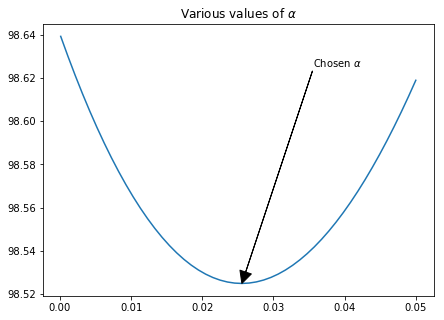

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title(r"Various values of $\alpha$")
xy = (alphas_to_test[smallest_idx], rcv3.cv_values_.mean(axis=0)[smallest_idx])
xytext = (xy[0] + .01, xy[1] + .1)
ax.annotate(r'Chosen $\alpha$', xy=xy, xytext=xytext,
arrowprops=dict(facecolor='black', shrink=0, width=0))
ax.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0));

### There's more...
如果我们想用其他误差自定义评分函数，也是可以实现的。前面我们介绍过MAD误
差，我们可以用它来评分。首先我们需要定义损失函数：

In [50]:
def MAD(target, prediction):
    absolute_deviation = np.abs(target - predicion)
    return absolute_deviation

定义损失函数之后，我们用 sklearn 量度中的 make_scorer 函数来处理。这样
做可以标准化自定义的函数，让scikit-learn对象可以使用它。另外，由于这是一个
损失函数不是一个评分函数，是越低越好，所以要用 sklearn 来把最小化问题转
化成最大化问题：

In [54]:
import sklearn
MAD = sklearn.metrics.make_scorer(MAD, greater_is_better=False)
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True, scoring=MAD)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv.cv_values_mean(axis=0).argmin()
alphas_to_test[smallest_idx]

TypeError: __call__() missing 1 required positional argument: 'y_true'

## LASSO正则化

LASSO（ least absolute shrinkage and selection operator，最小绝对值收缩和选
择算子）方法与岭回归和LARS（least angle regression，最小角回归）很类似。与
岭回归类似，它也是通过增加惩罚函数来判断、消除特征间的共线性。与LARS相
似的是它也可以用作参数选择，通常得出一个相关系数的稀疏向量。
### Getting ready
岭回归也不是万能药。有时就需要用LASSO回归来建模。本主题将用不同的损失函
数，因此就要用对应的效果评估方法。
### How to do it...
首先，我们还是用 make_regression 函数来建立数据集：

In [55]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200, n_features=500, n_informative=5, noise=5)

之后，我们导入 lasso 对象：

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso 包含很多参数，但是最意思的参数是 alpha ，用来调整 lasso 的惩罚
项，在How it works...会具体介绍。现在我们用默认值 1 。另外，和岭回归类
似，如果设置为 0 ，那么 lasso 就是线性回归：

In [57]:
lasso.fit(reg_data, reg_target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

再让我们看看还有多少相关系数非零：

In [58]:
import numpy as np
np.sum(lasso.coef_ != 0)

8

In [59]:
lasso_0 = Lasso(0)
lasso_0.fit(reg_data, reg_target)
np.sum(lasso_0.coef_ != 0)

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


500

和我们设想的一样，如果用线性回归，没有一个相关系数变成0。而且，如果你这
么运行代码，scikit-learn会给出建议，就像上面显示的那样。

### How it works...
对线性回归来说，我们是最小化残差平方和。而LASSO回归里，我们还是最小化残
差平方和，但是加了一个惩罚项会导致稀疏。如下所示：
$$\sum {e_i + \lambda \ {\begin{Vmatrix} \beta \end{Vmatrix}}_1}
$$
最小化残差平方和的另一种表达方式是：
$$ RSS(\beta),其中 {\begin{Vmatrix} \beta \end{Vmatrix}}_1 \lt \beta
$$
这个约束会让数据稀疏。LASSO回归的约束创建了围绕原点的超立方体（相关系数
是轴），也就意味着大多数点都在各个顶点上，那里相关系数为0。而岭回归创建
的是超平面，因为其约束是L2范数，少一个约束，但是即使有限制相关系数也不会
变成0。
### LASSO交叉检验
上面的公式中，选择适当的$\lambda$（在scikit-learn的 Lasso 里面是 alpha ，
但是书上都是$\lambda$）参数是关键。我们可以自己设置，也可以通过交叉检验
来获取最优参数：

In [60]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(reg_data, reg_target)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

lassocv 有一个属性就是确定最合适的$\lambda$：

In [61]:
lassocv.alpha_

0.88263792334082791

计算的相关系数也可以看到：

In [62]:
lassocv.coef_[:5]

array([ 0.,  0., -0., -0.,  0.])

用最近的参数拟合后， lassocv 的非零相关系数有29个：

In [63]:
np.sum(lassocv.coef_ != 0)

11

LASSO特征选择
LASSO通常用来为其他方法所特征选择。例如，你可能会用LASSO回归获取适当
的特征变量，然后在其他算法中使用。
要获取想要的特征，需要创建一个非零相关系数的列向量，然后再其他算法拟合：

In [64]:
mask = lassocv.coef_ != 0
new_reg_data = reg_data[:, mask]
new_reg_data.shape

(200, 11)

## LARS正则化

如果斯坦福大学的Bradley Efron, Trevor Hastie, Iain Johnstone和Robert Tibshirani
没有发现它的话[1]，LARS(Least Angle Regression，最小角回归)可能有一天会被
你想出来，它借用了威廉·吉尔伯特·斯特朗（William Gilbert Strang）介绍过的高斯
消元法（Gaussian elimination）的灵感。
### Getting ready
LARS是一种回归手段，适用于解决高维问题，也就是$p >> n$的情况，其中$p$表
示列或者特征变量，$n$表示样本数量。
### How to do it...
首先让我们导入必要的对象。这里我们用的数据集是200个数据，500个特征。我们
还设置了一个低噪声，和少量提供信息的（informative）特征：

In [65]:
import numpy as np
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200,n_features=500,n_informative=10, noise=2)

由于我们用了10个信息特征，因此我们还要为LARS设置10个非0的相关系数。我们
事先可能不知道信息特征的准确数量，但是出于试验的目的是可行的：

In [66]:
from sklearn.linear_model import Lars
lars = Lars(n_nonzero_coefs = 10)
lars.fit(reg_data, reg_target)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=10, normalize=True, positive=False,
   precompute='auto', verbose=False)

我们可以检验一下看看LARS的非0相关系数的和：

In [67]:
np.sum(lars.coef_ != 0)

10

问题在于为什么少量的特征反而变得更加有效。要证明这一点，让我们用一半数量
来训练两个LARS模型，一个用12个非零相关系数，另一个非零相关系数用默认
值。这里用12个是因为我们对重要特征的数量有个估计，但是可能无法确定准确的
数量：

In [68]:
train_n = 100
lars_12 = Lars(n_nonzero_coefs=12)
lars_12.fit(reg_data[:train_n], reg_target[:train_n])

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=12, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [69]:
lars_500 = Lars() #默认就是500
lars_500.fit(reg_data[:train_n], reg_target[:train_n])

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

现在，让我们看看拟合数据的效果如何，如下所示：

In [70]:
np.mean(np.power(reg_target[train_n:] - lars.predict(reg_data[train_n:]), 2))

5.4690657874292405

In [71]:
np.mean(np.power(reg_target[train_n:] - lars_12.predict(reg_data[train_n:]), 2))

15.00391724221546

In [72]:
np.mean(np.power(reg_target[train_n:] - lars_500.predict(reg_data[train_n:]), 2))

1.0205935283426184e+30

仔细看看这组结果；测试集的误差明显高很多。高维数据集问题就在于此；通常面
对大量的特征时，想找出一个对训练集拟合很好的模型并不难，但是拟合过度却是
更大的问题。

### How it works...
LARS通过重复选择与残存变化相关的特征。从图上看，相关性实际上就是特征与
残差之间的最小角度；这就是LARS名称的由来。
选择第一个特征之后，LARS会继续沿着最小角的方向移动，直到另一个特征与残
差有同样数量的相关性。然后，LARS会沿着两个特征组合的角度移动。如下图所
示：

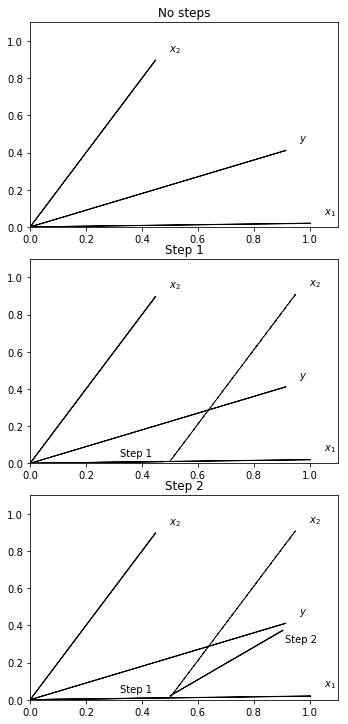

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
def unit(*args):
    squared = map(lambda x: x**2, args)
    distance = sum(squared) ** (.5)
    return map(lambda x: x / distance, args)
f, ax = plt.subplots(nrows=3, figsize=(5, 10))
plt.tight_layout()
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$x_2$")
x, y = unit(1, .45)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$y$")
ax[0].set_title("No steps")
# step 1
ax[1].set_title("Step 1")
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$x_2$")
x, y = unit(.5, 1)
ax[1].arrow(.5, 0.01, x, y, ls='dashed', edgecolor='black', facecolor='black')
ax[1].text(x + .5 + .05, y + .01 + .05, r"$x_2$")
ax[1].arrow(0, 0, .47, .01, width=.0015, edgecolor='black', facecolor='black')
ax[1].text(.47-.15, .01 + .03, "Step 1")
x, y = unit(1, .45)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$y$")
# step 2
ax[2].set_title("Step 2")
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$x_2$")
x, y = unit(.5, 1)
ax[2].arrow(.5, 0.01, x, y, ls='dashed', edgecolor='black', facecolor='black')
ax[2].text(x + .5 + .05, y + .01 + .05, r"$x_2$")
ax[2].arrow(0, 0, .47, .01, width=.0015, edgecolor='black', facecolor='black')
ax[2].text(.47-.15, .01 + .03, "Step 1")
## step 2
x, y = unit(1, .45)
ax[2].arrow(.5, .02, .4, .35, width=.0015, edgecolor='black', facecolor='black')
ax[2].text(x, y - .1, "Step 2")
x, y = unit(1, .45)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$y$");

具体过程是，我们把$x2$沿着$x1$方向移动到一个位置：$x1$与$y$的点积与
$x1$与$y$的点积相同。到了这个位置之后，我们再沿着$x1$和$x2$夹角的一半的
方向移动。
### There's more...
和我们前面用交叉检验来优化领回归模型一样，我们可以对LARS做交叉检验：

In [76]:
from sklearn.linear_model import LarsCV
lcv = LarsCV()
lcv.fit(reg_data, reg_target)

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 159 iterations, i.e. alpha=2.515e-02, with an active set of 132 regressors, and the smallest cholesky pivot element being 6.664e-08
  ConvergenceWarning)


LarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    positive=False, precompute='auto', verbose=False)

用交叉检验可以帮助我们确定需要使用的非零相关系数的最佳数量。验证如下所
示：

In [78]:
np.sum(lcv.coef_ != 0)

30

说实话，LARS的精髓还没有领会，抽空会把原文译出来，看各种解释不如看原
文。

## 用线性方法处理分类问题——逻辑回归

实际上线性模型也可以用于分类任务。方法是把一个线性模型拟合成某个类型的概
率分布，然后用一个函数建立阈值来确定结果属于哪一类。
### Getting ready
这里用的函数是经典的逻辑函数。一个非常简单的函数：
$$f(x)= \frac 1 {1+e^{-t}}$$
它的图形如下图所示：

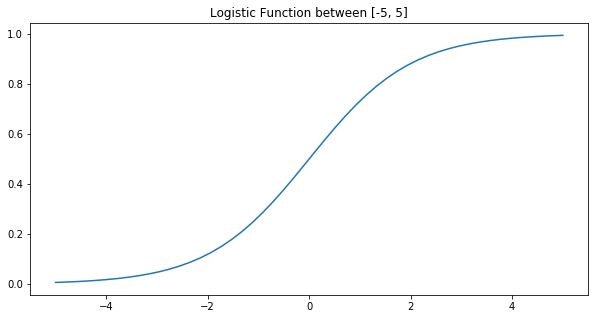

In [80]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 5))
rng = np.linspace(-5, 5)
log_f = np.apply_along_axis(lambda x:1 / (1 + np.exp(-x)), 0, rng)
ax.set_title("Logistic Function between [-5, 5]")
ax.plot(rng, log_f)

让我们用 make_classification 方法创建一个数据集来进行分类：

In [85]:
from sklearn.datasets import make_classification
X, y =make_classification(n_samples=1000, n_features=4)

### How to do it...
LogisticRegression 对象和其他线性模型的用法一样：

In [81]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

我们将把前面200个数据作为训练集，最后200个数据作为测试集。因为这是随机数
据集，所以用最后200个数据没问题。但是如果处理具有某种结构的数据，就不能
这么做了（例如，你的数据集是时间序列数据）：

In [86]:
X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

在本书后面的内容里，我们将详细介绍交叉检验。这里，我们需要的只是用逻辑回
归拟合模型。我们会关注训练集的预测结果，就像测试集预测结果一样。经常对比
两个数据集预测正确率是个好做法。通常，你在训练集获得的结果更好；模型在测
试集上预测失败的比例也至关重要：

In [87]:
lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)

现在我们有了预测值，让我们看看预测的效果。这里，我们只简单看看预测正确的
比例；后面，我们会详细的介绍分类模型效果的评估方法。
计算很简单，就是用预测正确的数量除以总样本数：

In [89]:
(y_train_predictions == y_train).sum().astype(float) / y_train.shape[0]

0.90249999999999997

测试集的效果是：

In [90]:
(y_test_predictions == y_test).sum().astype(float) / y_test.shape[0]

0.93000000000000005

可以看到，测试集的正确率和训练集的结果差不多。但是实际中通常差别很大。
现在问题变成，怎么把逻辑函数转换成分类方法。
首先，线性回归希望找到一个线性方程拟合出给定自变量$X$条件下因变量$Y$的
期望值，就是$E(Y|X)=x \beta$。这里$Y$的值是某个类型发生的概率。因此，我
们要解决的分类问题就是$E(p|X)=x \beta$。然后，只要阈值确定，就会有
$Logit(p) = X \beta$。这个理念的扩展形式可以构成许多形式的回归行为，例如，
泊松过程（Poisson）。
### There's more...
下面的内容你以后肯定会遇到。一种情况是一个类型与其他类型的权重不同；例
如，一个能可能权重很大，99%。这种情况在分类工作中经常遇到。经典案例就是
信用卡虚假交易检测，大多数交易都不是虚假交易，但是不同类型误判的成本相差
很大。
让我们建立一个分类问题，类型$y$的不平衡权重95%，我们看看基本的逻辑回归
模型如何处理这类问题：

In [91]:
X, y =make_classification(n_samples=5000, n_features=4, weights=[.95])

In [92]:
sum(y)/(len(y)*1.)

0.054800000000000001

建立训练集和测试集，然后用逻辑回归拟合：

In [95]:
X_train = X[:-500]
X_test = X[-500:]
y_train = y[:-500]
y_test = y[-500:]

lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)

现在我们在看看模型拟合的情况：

In [96]:
(y_train_predictions == y_train).sum().astype(float) / y_train.shape[0]

0.97755555555555551

In [98]:
(y_test_predictions == y_test).sum().astype(float) / y_test.shape[0]

0.98199999999999998

结果看着还不错，但这是说如果我们把一个交易预测成正常交易（或者称为类型
0），那么我们有95%左右的可能猜对。如果我们想看看模型对类型1的预测情况，
可能就不是那么好了：

In [99]:
(y_test[y_test==1] == y_test_predictions[y_test==1]).sum().astype(float) / y_test[y_test==1].shape[0]

0.75862068965517238

如果相比正常交易，我们更关心虚假交易；那么这是由商业规则决定的，我们可能
会改变预测正确和预测错误的权重。
通常情况下，虚假交易与正常交易的权重与训练集的类型权重的倒数一致。但是，
因为我们更关心虚假交易，所有让我们用多重采样（oversample）方法来表示虚假
交易与正常交易的权重

In [100]:
lr = LogisticRegression(class_weight={0: .15, 1: .85})
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [101]:
y_train_predicionts = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)

In [102]:
(y_test[y_test==1] == y_test_predictions[y_test==1]).sum().astype(float) / y_test[y_test==1].shape[0]

0.89655172413793105

但是，这么做需要付出什么代价？让我们看看：

In [103]:
(y_test_predictions == y_test).sum().astype(float) / y_test.shape[0]

0.97199999999999998

可以看到，准确率降低了1%。这样是否合适由你的问题决定。如果与虚假交易相
关的评估成本非常高，那么它就能抵消追踪虚假交易付出的成本。

## 贝叶斯岭回归

在用岭回归弥补线性回归的不足主题中，我们介绍了岭回归优化的限制条件。我们
还介绍了相关系数的先验概率分布的贝叶斯解释，将很大程度地影响着先验概率分
布，先验概率分布通常均值是0。
因此，现在我们就来演示如何scikit-learn来应用这种解释。
### Getting ready
岭回归和套索回归（lasso regression）用贝叶斯观点来解释，与频率优化观点解释
相反。scikit-learn只实现了贝叶斯岭回归，但是在How it works...一节，我们将对比
两种回归算法。
首先，我们创建一个回归数据集：

In [104]:
from sklearn.datasets import make_regression
X, y = make_regression(1000, 10, n_informative=2, noise=20)

### How to do it...
我们可以把岭回归加载进来拟合模型：

In [106]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

有两组相关系数，分别是 alpha_1 / alpha_2 和 lambda_1 / lambda_2 。其
中， alpha_* 是先验概率分布的$\alpha$超参数， lambda_* 是先验概率分布的
$\lambda$超参数。
首先，让我们不调整参数直接拟合模型：

In [107]:
br.fit(X, y)
br.coef_

array([  0.50156279,  79.18839385,  -1.18612825,  -0.42592529,
         0.63847486,  -1.31591868,  22.43981645,  -0.62988679,
        -0.50981261,   0.55965124])

现在，我们来调整超参数，注意观察相关系数的变化：

In [108]:
br_alphas = BayesianRidge(alpha_1=10, lambda_1=10)
br_alphas.fit(X, y)
br_alphas.coef_

array([  0.50066887,  79.09773026,  -1.18286407,  -0.42463843,
         0.63850704,  -1.31198103,  22.41464737,  -0.63026733,
        -0.50517802,   0.55579574])

### How it works...
因为是贝叶斯岭回归，我们假设先验概率分布带有误差和$\alpha$参数，先验概率
分布都服从$\Gamma$分布。
$\Gamma$分布是一种极具灵活性的分布。不同的形状参数和尺度参数的
$\Gamma$分布形状有差异。1e-06是 scikit-learn里面 BayesianRidge 形状参数
的默认参数值。

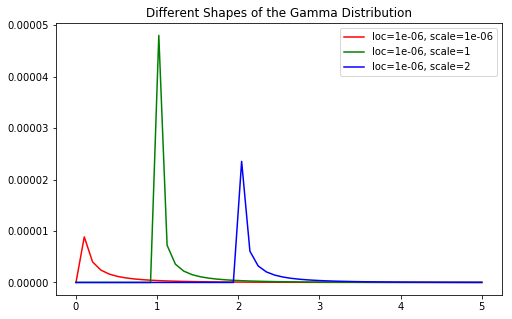

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gamma
import numpy as np
form = lambda x, y: "loc={}, scale={}".format(x, y)
g = lambda x, y=1e-06, z=1e-06: gamma.pdf(x, y, z)
g2 = lambda x, y=1e-06, z=1: gamma.pdf(x, y, z)
g3 = lambda x, y=1e-06, z=2: gamma.pdf(x, y, z)
rng = np.linspace(0, 5)
f, ax = plt.subplots(figsize=(8, 5))
ax.plot(rng, list(map(g, rng)), label=form(1e-06, 1e-06), color='r')
ax.plot(rng, list(map(g2, rng)), label=form(1e-06, 1), color='g')
ax.plot(rng, list(map(g3, rng)), label=form(1e-06, 2), color='b')
ax.set_title("Different Shapes of the Gamma Distribution")
ax.legend()

你会看到，相关系数最终都会收缩到0，尤其当形状参数特别小的时候。
### There's more...
就像我前面介绍的，还有一种套索回归的贝叶斯解释。我们把先验概率分布看出是
相关系数的函数；它们本身都是随机数。对于套索回归，我们选择一个可以产生0
的分布，比如双指数分布（Double Exponential Distribution，也叫Laplace
distribution）。

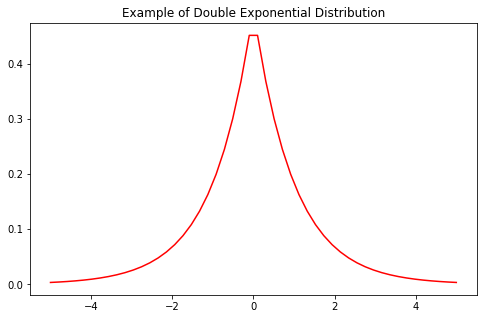

In [110]:
from scipy.stats import laplace
form = lambda x, y: "loc={}, scale={}".format(x, y)
g = lambda x: laplace.pdf(x)
rng = np.linspace(-5, 5)
f, ax = plt.subplots(figsize=(8, 5))
ax.plot(rng, list(map(g, rng)), color='r')
ax.set_title("Example of Double Exponential Distribution")

留意看x轴为0处的顶点。这将会使套索回归的相关系数为0。通过调整超参数，还
有可能创建出相关系数为0的情况，这由问题的具体情况决定。

## 用梯度提升回归从误差中学习

梯度提升回归（Gradient boosting regression，GBR）是一种从它的错误中进行学
习的技术。它本质上就是集思广益，集成一堆较差的学习算法进行学习。有两点需
要注意：

1. 每个学习算法准确率都不高，但是它们集成起来可以获得很好的准确率。
2. 这些学习算法依次应用，也就是说每个学习算法都是在前一个学习算法的错误中学习。

### Getting ready
我们还是用基本的回归数据来演示GBR：

In [111]:
import numpy as np
from sklearn.datasets import make_regression
X, y = make_regression(1000, 2, noise=2)

### How to do it...
GBR算是一种集成模型因为它是一个集成学习算法。这种称谓的含义是指GBR用许
多较差的学习算法组成了一个更强大的学习算法：

In [112]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr = GBR()
gbr.fit(X, y)
gbr_preds = gbr.predict(X)

很明显，这里应该不止一个模型，但是这种模式现在很简明。现在，让我们用基本
回归算法来拟合数据当作参照：

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr_preds = lr.predict(X)

有了参照之后，让我们看看GBR算法与线性回归算法效果的对比情况。图像生成可
以参照第一章正态随机过程的相关主题，首先需要下面的计算：

In [115]:
gbr_residuals = y - gbr_preds
lr_residuals = y - lr_preds

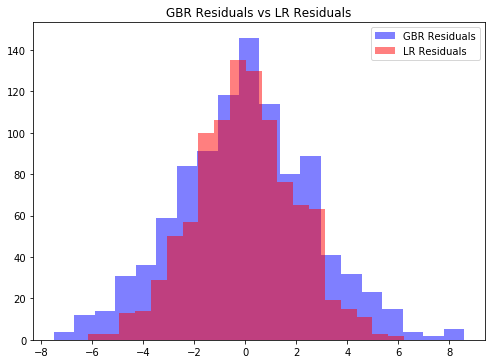

In [116]:
%matplotlib inline
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(gbr_residuals,bins=20,label='GBR Residuals', color='b',alpha=.5);
ax.hist(lr_residuals,bins=20,label='LR Residuals', color='r', alpha=.5);
ax.set_title("GBR Residuals vs LR Residuals")
ax.legend(loc='best')

看起来好像GBR拟合的更好，但是并不明显。让我们用95%置信区间（Confidence
interval,CI）对比一下：

In [118]:
np.percentile(gbr_residuals, [2.5, 97.5])

array([-5.32138209,  5.37456372])

GBR的置信区间更小，数据更集中，因此其拟合效果更好；我们还可以对GBR算法
进行一些调整来改善效果。我用下面的例子演示一下，然后在下一节介绍优化方
法：

In [119]:
n_estimators = np.arange(100, 1100, 350)
gbrs = [GBR(n_estimators=n_estimator) for n_estimator in n_estimators]
residuals = {}
for i, gbr in enumerate(gbrs):
    gbr.fit(X, y)
    residuals[gbr.n_estimators] = y - gbr.predict(X)

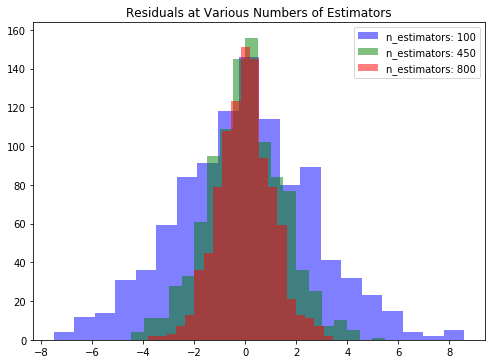

In [122]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
colors = {800:'r', 450:'g', 100:'b'}
for k, v in residuals.items():
    ax.hist(v,bins=20,label='n_estimators: %d' % k, color=colors[k], alpha=.5)
    ax.set_title("Residuals at Various Numbers of Estimators")
    ax.legend(loc='best')

图像看着有点混乱，但是依然可以看出随着估计器数据的增加，误差在减少。不
过，这并不是一成不变的。首先，我们没有交叉检验过，其次，随着估计器数量的
增加，训练时间也会变长。现在我们用数据比较小没什么关系，但是如果数据再放
大一两倍问题就出来了。
### How it works...
上面例子中GBR的第一个参数是 n_estimators ，指GBR使用的学习算法的数
量。通常，如果你的设备性能更好，可以把 n_estimators 设置的更大，效果也
会更好。还有另外几个参数要说明一下。
你应该在优化其他参数之前先调整 max_depth 参数。因为每个学习算法都是一颗
决策树， max_depth 决定了树生成的节点数。选择合适的节点数量可以更好的拟
合数据，而更多的节点数可能造成拟合过度。
loss 参数决定损失函数，也直接影响误差。 ls 是默认值，表示最小二乘法
（least squares）。还有最小绝对值差值，Huber损失和分位数损失（quantiles）
等等。